# Using non-linear multiple regression to predict `wage` in `Wage` dataset

We're modifying the exercise a bit to consider multiple regression (as opposed to considering different predictors individually). It's not hard to see how the techniques of this chapter generalize to the multiple regression setting.

## Preparing the data

### Loading

In [46]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()

wage = pd.read_csv("../../datasets/Wage.csv")
wage.head()

,Unnamed: 0,year,age,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
0,231655,2006,18,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.043154
1,86582,2004,24,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.476020
2,161300,2003,45,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.982177
3,155159,2003,43,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.041393,154.685293
4,11443,2005,50,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.318063,75.043154


In [47]:
wage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 12 columns):
Unnamed: 0    3000 non-null int64
year          3000 non-null int64
age           3000 non-null int64
maritl        3000 non-null object
race          3000 non-null object
education     3000 non-null object
region        3000 non-null object
jobclass      3000 non-null object
health        3000 non-null object
health_ins    3000 non-null object
logwage       3000 non-null float64
wage          3000 non-null float64
dtypes: float64(2), int64(3), object(7)
memory usage: 281.3+ KB


### Cleaning

#### Drop columns

The unnamed column appears to be some sort of id number, which is useless for our purposes. We can also drop `logwage` since it's redundant

In [48]:
wage = wage.drop(columns=['Unnamed: 0', 'logwage'])

#### Convert to numerical dtypes

In [49]:
wage_num = pd.get_dummies(wage)
wage_num.head()

,year,age,wage,maritl_1. Never Married,maritl_2. Married,maritl_3. Widowed,maritl_4. Divorced,maritl_5. Separated,race_1. White,race_2. Black,...,education_3. Some College,education_4. College Grad,education_5. Advanced Degree,region_2. Middle Atlantic,jobclass_1. Industrial,jobclass_2. Information,health_1. <=Good,health_2. >=Very Good,health_ins_1. Yes,health_ins_2. No
0,2006,18,75.043154,1,0,0,0,0,1,0,...,0,0,0,1,1,0,1,0,0,1
1,2004,24,70.476020,1,0,0,0,0,1,0,...,0,1,0,1,0,1,0,1,0,1
2,2003,45,130.982177,0,1,0,0,0,1,0,...,1,0,0,1,1,0,1,0,1,0
3,2003,43,154.685293,0,1,0,0,0,0,0,...,0,1,0,1,0,1,0,1,1,0
4,2005,50,75.043154,0,0,0,1,0,1,0,...,0,0,0,1,0,1,1,0,1,0


### Preprocessing

#### Scaling the numerical variables

In [51]:
df = wage_num[['year', 'age', 'wage']]
wage_num_std = wage_num.copy()
wage_num_std.loc[:, ['year', 'age', 'wage']] = (df - df.mean())/df.std()
wage_num_std.head()

,year,age,wage,maritl_1. Never Married,maritl_2. Married,maritl_3. Widowed,maritl_4. Divorced,maritl_5. Separated,race_1. White,race_2. Black,...,education_3. Some College,education_4. College Grad,education_5. Advanced Degree,region_2. Middle Atlantic,jobclass_1. Industrial,jobclass_2. Information,health_1. <=Good,health_2. >=Very Good,health_ins_1. Yes,health_ins_2. No
0,0.103150,-2.115215,-0.878545,1,0,0,0,0,1,0,...,0,0,0,1,1,0,1,0,0,1
1,-0.883935,-1.595392,-0.987994,1,0,0,0,0,1,0,...,0,1,0,1,0,1,0,1,0,1
2,-1.377478,0.223986,0.461999,0,1,0,0,0,1,0,...,1,0,0,1,1,0,1,0,1,0
3,-1.377478,0.050712,1.030030,0,1,0,0,0,0,0,...,0,1,0,1,0,1,0,1,1,0
4,-0.390392,0.657171,-0.878545,0,0,0,1,0,1,0,...,0,0,0,1,0,1,1,0,1,0


## Fitting some nonlinear models

In [52]:
X_sc, y_sc = wage_num_std.drop(columns=['wage']).values, wage_num_std['wage'].values

In [53]:
X_sc.shape, y_sc.shape

((3000, 23), (3000,))

### Polynomial Ridge Regression

We don't need a special module for this model - we can use a `scikit-learn` pipeline.

We'll use 10-fold cross validation to pick the polynomial degree and L2 penalty.

In [8]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge

pr_pipe = Pipeline([('poly', PolynomialFeatures()), ('ridge', Ridge())])
pr_param_grid = dict(poly__degree=np.arange(1, 5), ridge__alpha=np.logspace(-4, 4, 5))
pr_search = GridSearchCV(pr_pipe, pr_param_grid, cv=5, scoring='neg_mean_squared_error')
pr_search.fit(X_sc, y_sc)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('ridge', Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'poly__degree': array([1, 2, 3, 4]), 'ridge__alpha': array([1.e-04, 1.e-02, 1.e+00, 1.e+02, 1.e+04])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [9]:
pr_search.best_params_

{'poly__degree': 2, 'ridge__alpha': 100.0}

### Local Regression

`scikit-learn` has [support for local regression](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html)

In [10]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

lr_param_grid = dict(n_neighbors=np.arange(1,7), weights=['uniform', 'distance'], 
                     p=np.arange(1, 7))
lr_search = GridSearchCV(KNeighborsRegressor(), lr_param_grid, cv=10, 
                         scoring='neg_mean_squared_error')
lr_search.fit(X_sc, y_sc)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': array([1, 2, 3, 4, 5, 6]), 'weights': ['uniform', 'distance'], 'p': array([1, 2, 3, 4, 5, 6])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [11]:
lr_search.best_params_

{'n_neighbors': 6, 'p': 1, 'weights': 'uniform'}

### GAMs

GAMs are quite general. There exists python modules that implement specific choices for the nonlinear component functions $f_i(X_i)$. Here we'll explore two modules that seem relatively mature/well-maintained.

#### GAMs with `pyGAM`

The module [`pyGAM`](https://pygam.readthedocs.io/en/latest/?badge=latest) implements [P-splines](https://en.wikipedia.org/wiki/B-spline#P-spline).

In [12]:
from pygam import GAM, s, f

# generate string for terms
spline_terms = ' + '.join(['s(' + str(i) + ')' for i in range(0,3)])
factor_terms = ' + '.join(['f(' + str(i) + ')' 
                           for i in range(3,X_sc.shape[1])])
terms = spline_terms + ' + ' + factor_terms
terms


's(0) + s(1) + s(2) + f(3) + f(4) + f(5) + f(6) + f(7) + f(8) + f(9) + f(10) + f(11) + f(12) + f(13) + f(14) + f(15) + f(16) + f(17) + f(18) + f(19) + f(20) + f(21) + f(22)'

In [13]:
pygam_gam = GAM(s(0) + s(1) + s(2) + f(3) + f(4) + f(5) + f(6) + f(7) 
                + f(8) + f(9) + f(10) + f(11) + f(12) + f(13) + f(14) 
                + f(15) + f(16) + f(17) + f(18) + f(19) + f(20) + f(21) 
                + f(22))

In [42]:
ps_search = pygam_gam.gridsearch(X_sc, y_sc, progress=True, 
                     lam=np.exp(np.random.rand(100, 23) * 6 - 3))

100% (100 of 100) |######################| Elapsed Time: 0:00:13 Time:  0:00:13


## Model Selection

As in exercise 6, we'll select a model on the basis of mean squared test error. 

In [43]:
mse_test_df = pd.DataFrame({'mse_test':np.zeros(3)}, index=['poly_ridge', 'local_reg', 'p_spline'])

# polynomial ridge and local regression models already have CV estimates of test mse
mse_test_df.at['poly_ridge', 'mse_test'] = -pr_search.best_score_
mse_test_df.at['local_reg', 'mse_test'] = -lr_search.best_score_

In [44]:
from sklearn.model_selection import cross_val_score

# get p-spline CV estimate of test mse
mse_test_df.at['p_spline', 'mse_test'] = -np.mean(cross_val_score(ps_search,
                                                                  X_sc, y_sc, scoring='neg_mean_squared_error',
                                                                  cv=10))

In [110]:
mse_test_df

,mse_test
poly_ridge,0.653614
local_reg,0.741645
p_spline,1.000513


Polynomial ridge regression has won out. Since this CV mse estimate was calculated on scaled data, let's get the estimate for the original data


In [57]:
%%capture
X, y = wage_num.drop(columns=['wage']).values, wage_num['wage'].values
cv_score = cross_val_score(pr_search.best_estimator_, X, y, scoring='neg_mean_squared_error', cv=10)

In [61]:
mse = -np.mean(cv_score)
mse

1137.2123862552992

In [66]:
me = np.sqrt(mse)
me

33.722579768684646

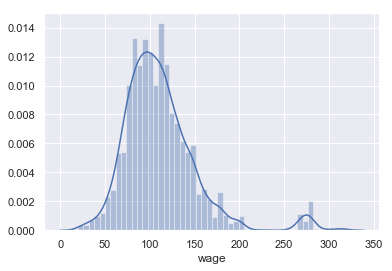

In [63]:
sns.distplot(wage['wage'])

In [65]:
wage['wage'].describe()

count    3000.000000
mean      111.703608
std        41.728595
min        20.085537
25%        85.383940
50%       104.921507
75%       128.680488
max       318.342430
Name: wage, dtype: float64

This model predicts a mean (absolute) error of $~\approx 33.7$

In [75]:
print('{}'.format(round(me/wage['wage'].std(), 2)))

0.81


which is 0.81 standard deviations.

## Improvements

After inspecting the distribution of `wage`, it's fairly clear there is a group of outliers that are no doubt affecting the prediction accuracy of the model. Let's try to separate that group.

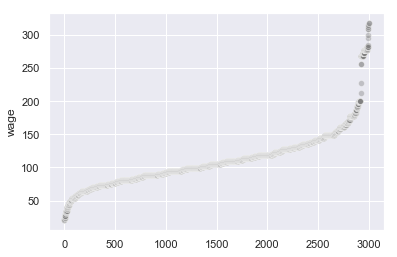

In [80]:
sns.scatterplot(x=wage.index, y=wage['wage'].sort_values(), alpha=0.4, color='grey')

There appears to be a break point around 250. Let's take all rows with wage less than this

In [96]:
wage_num_low = wage_num[wage_num['wage'] < 250]
wage_num_low_sc = wage_num_low.copy()

df = wage_num_low_sc[['year', 'age', 'wage']]
wage_num_low_sc.loc[:, ['year', 'age', 'wage']] = (df - df.mean())/df.std()

Let train the same models again

In [97]:
X_low_sc, y_low_sc = wage_num_low_sc.drop(columns=['wage']).values, wage_num_low_sc['wage']

# polynomial ridge model
pr_search.fit(X_low_sc, y_low_sc)

/Users/home/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('ridge', Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'poly__degree': array([1, 2, 3, 4]), 'ridge__alpha': array([1.e-04, 1.e-02, 1.e+00, 1.e+02, 1.e+04])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [113]:
pr_search.best_params_

{'poly__degree': 2, 'ridge__alpha': 100.0}

In [98]:
# local regression
lr_search.fit(X_low_sc, y_low_sc)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': array([1, 2, 3, 4, 5, 6]), 'weights': ['uniform', 'distance'], 'p': array([1, 2, 3, 4, 5, 6])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [114]:
lr_search.best_params_

{'n_neighbors': 6, 'p': 5, 'weights': 'uniform'}

In [99]:
# p spline 
ps_search = pygam_gam.gridsearch(X_low_sc, y_low_sc, progress=True, 
                     lam=np.exp(np.random.rand(100, 23) * 6 - 3))

100% (100 of 100) |######################| Elapsed Time: 0:00:25 Time:  0:00:25


In [119]:
ps_search.summary()

GAM                                                                                                       
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     28.9895
Link Function:                     IdentityLink Log Likelihood:                                 -3606.1899
Number of Samples:                         2921 AIC:                                             7272.3587
                                                AICc:                                            7273.0018
                                                GCV:                                                0.6157
                                                Scale:                                              0.6047
                                                Pseudo R-Squared:                                   0.4011
Feature Function                  Lam

/Users/home/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  """Entry point for launching an IPython kernel.


In [121]:
low_mse_test_df = pd.DataFrame({'low_mse_test':np.zeros(3)}, index=['poly_ridge', 'local_reg', 'p_spline'])
low_mse_test_df.at['poly_ridge', 'low_mse_test'] = -pr_search.best_score_
low_mse_test_df.at['local_reg', 'low_mse_test'] = -lr_search.best_score_
low_mse_test_df.at['p_spline', 'low_mse_test'] = -np.mean(cross_val_score(ps_search,
                                                                 X_low_sc, y_low_sc, scoring='neg_mean_squared_error',
                                                                 cv=10))
mse_df = pd.concat([mse_test_df, low_mse_test_df], axis=1)
mse_df

,mse_test,low_mse_test
poly_ridge,0.653614,0.613098
local_reg,0.741645,0.701615
p_spline,1.000513,1.000513


There was a considerable improvement for the polynomial ridge and local regression models.